In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

In [30]:
def load_and_prepare_data(filename, coin_name):
    
    df = pd.read_csv(filename)

    df.rename(columns={"time_period_end": "time"}, inplace=True)

    df["time"] = pd.to_datetime(df["time"])

    df.sort_values("time", inplace=True)

    df[coin_name + "_return"] = df["price_close"].pct_change()
    
    return df[["time", coin_name + "_return"]]

In [49]:
avax_df  = load_and_prepare_data("../data/hourly_crypto_data/avax_hourly.csv",  "avax")
btc_df   = load_and_prepare_data("../data/hourly_crypto_data/btc_hourly.csv",   "btc")
eth_df   = load_and_prepare_data("../data/hourly_crypto_data/eth_hourly.csv",   "eth")
matic_df = load_and_prepare_data("../data/hourly_crypto_data/matic_hourly.csv", "matic")
sol_df   = load_and_prepare_data("../data/hourly_crypto_data/sol_hourly.csv",   "sol")
bnb_df   = load_and_prepare_data("../data/hourly_crypto_data/bnb_hourly.csv",   "bnb")
cardano_df   = load_and_prepare_data("../data/hourly_crypto_data/cardano_hourly.csv",   "cardano")
link_df   = load_and_prepare_data("../data/hourly_crypto_data/link_hourly.csv",   "link")
xrp_df   = load_and_prepare_data("../data/hourly_crypto_data/xrp_hourly.csv",   "xrp")
tron_df   = load_and_prepare_data("../data/hourly_crypto_data/tron_hourly.csv",   "tron")
arbitrum_df   = load_and_prepare_data("../data/hourly_crypto_data/arbitrum_hourly.csv",   "arbitrum")

In [50]:
avax_df.head()

,time,avax_return
0,2020-09-22 07:00:00+00:00,NaN
1,2020-09-22 08:00:00+00:00,0.005839
2,2020-09-22 09:00:00+00:00,0.389502
3,2020-09-22 10:00:00+00:00,-0.089579
4,2020-09-22 11:00:00+00:00,-0.116040


In [33]:
btc_df.head()

,time,btc_return
0,2015-01-14 17:00:00+00:00,NaN
1,2015-01-14 19:00:00+00:00,0.000484
2,2015-01-14 20:00:00+00:00,-0.354839
3,2015-01-15 02:00:00+00:00,0.600000
4,2015-01-15 05:00:00+00:00,-0.218750


In [34]:
eth_df.head()

,time,eth_return
0,2017-08-17 05:00:00+00:00,NaN
1,2017-08-17 06:00:00+00:00,0.004940
2,2017-08-17 07:00:00+00:00,-0.001386
3,2017-08-17 08:00:00+00:00,0.017444
4,2017-08-17 09:00:00+00:00,0.002143


In [35]:
matic_df.head()

,time,matic_return
0,2019-04-26 16:00:00+00:00,NaN
1,2019-04-26 17:00:00+00:00,-0.080952
2,2019-04-26 18:00:00+00:00,-0.082902
3,2019-04-26 19:00:00+00:00,-0.058380
4,2019-04-26 20:00:00+00:00,-0.010000


In [36]:
sol_df.head()

,time,sol_return
0,2020-08-11 07:00:00+00:00,NaN
1,2020-08-11 08:00:00+00:00,-0.009859
2,2020-08-11 09:00:00+00:00,0.012866
3,2020-08-11 10:00:00+00:00,-0.035709
4,2020-08-11 11:00:00+00:00,0.015170


In [ ]:
def plot_cumulative_return_data(df, coin_name, title='Cumulative Returns', figsize=(10, 6)):
    return_column = coin_name + "_return"
    df["cumulative_return"] = (1 + df[return_column]).cumprod() - 1

    plt.figure(figsize=figsize)
    plt.plot(df["time"], df["cumulative_return"], linestyle='-', color='b')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Cumulative Return')
    plt.grid(True)
    plt.show()


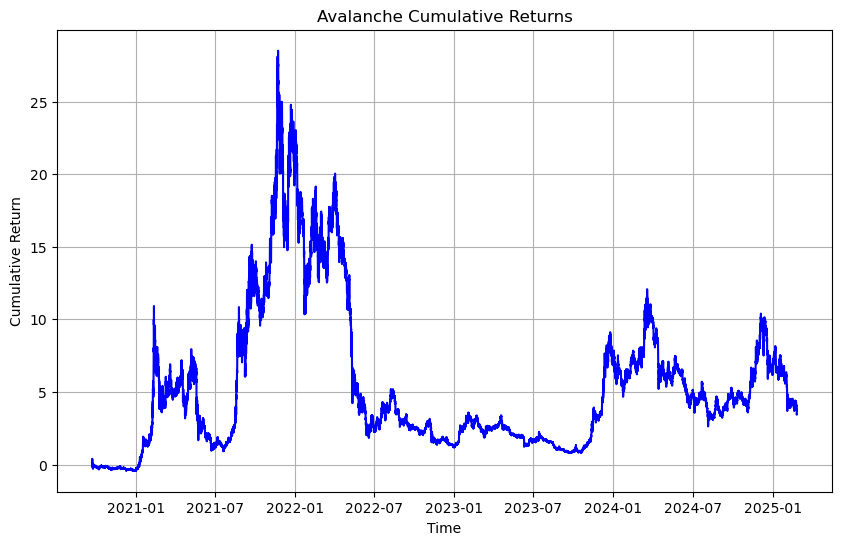

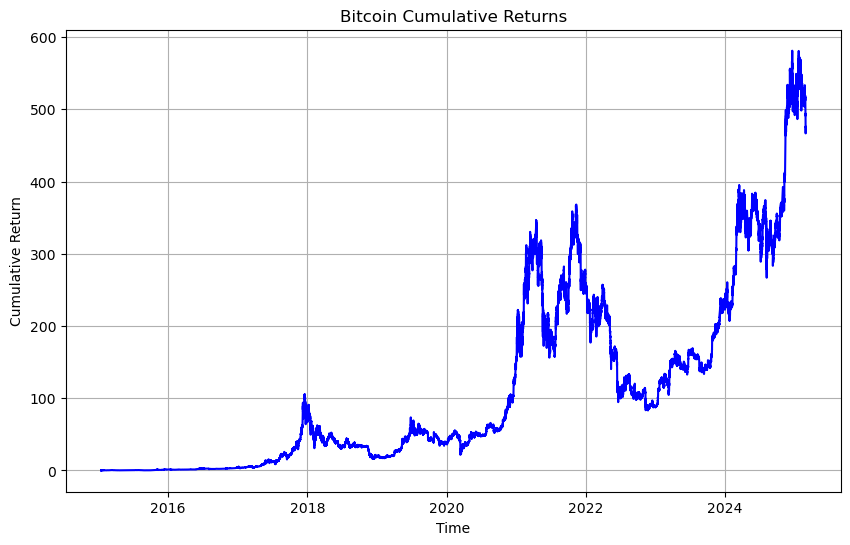

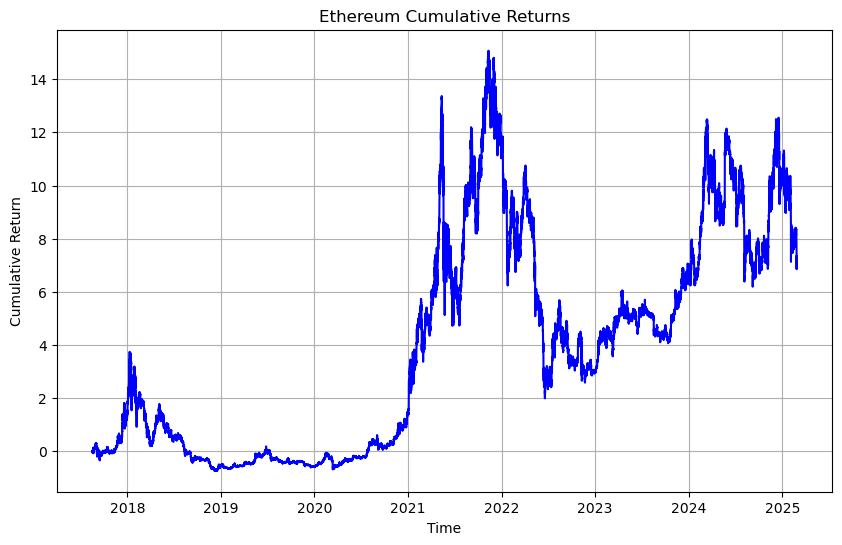

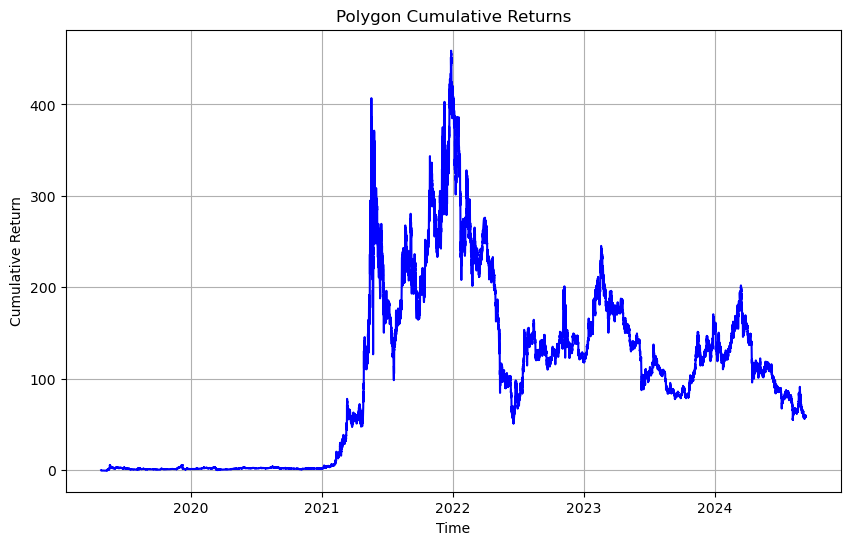

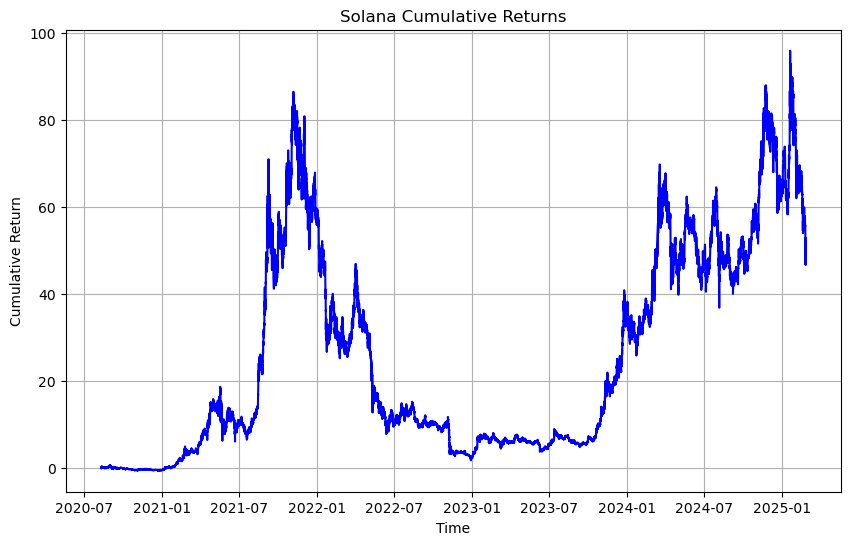

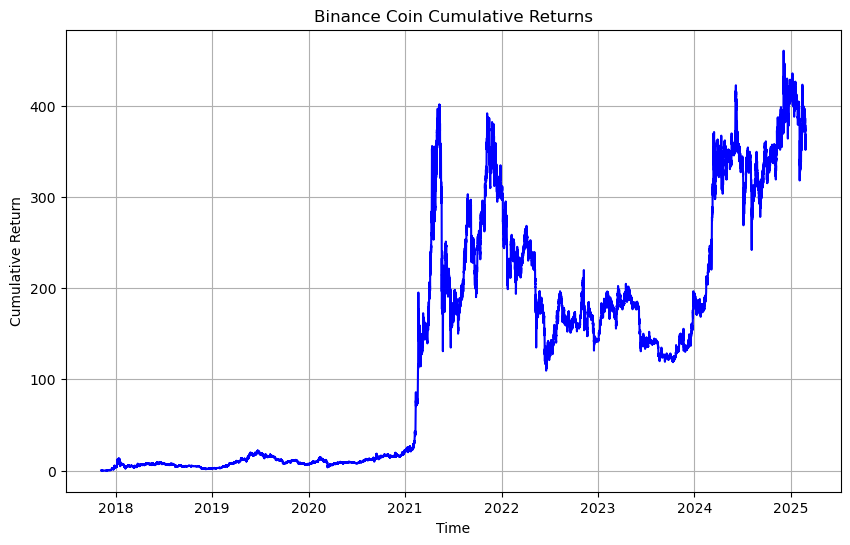

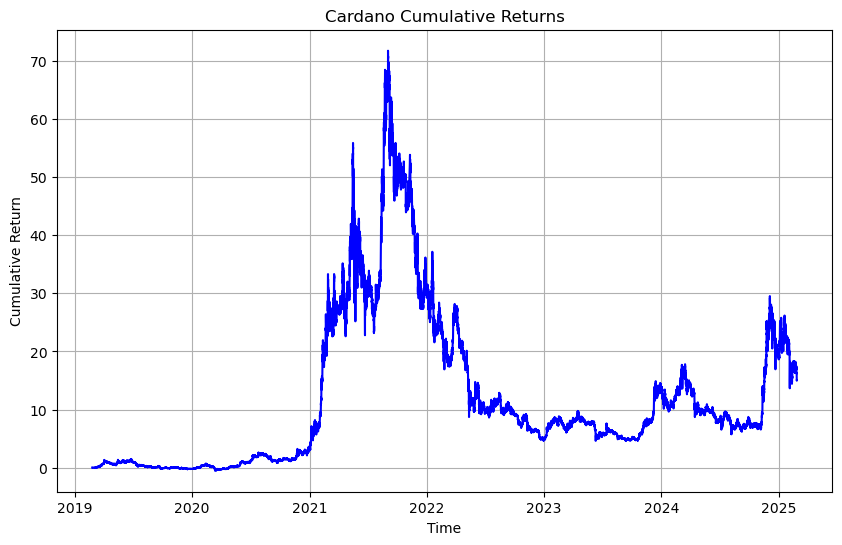

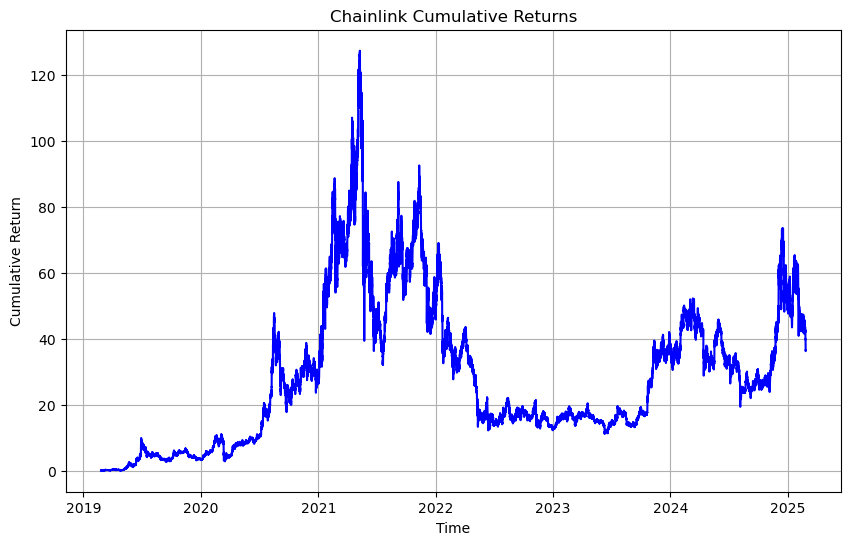

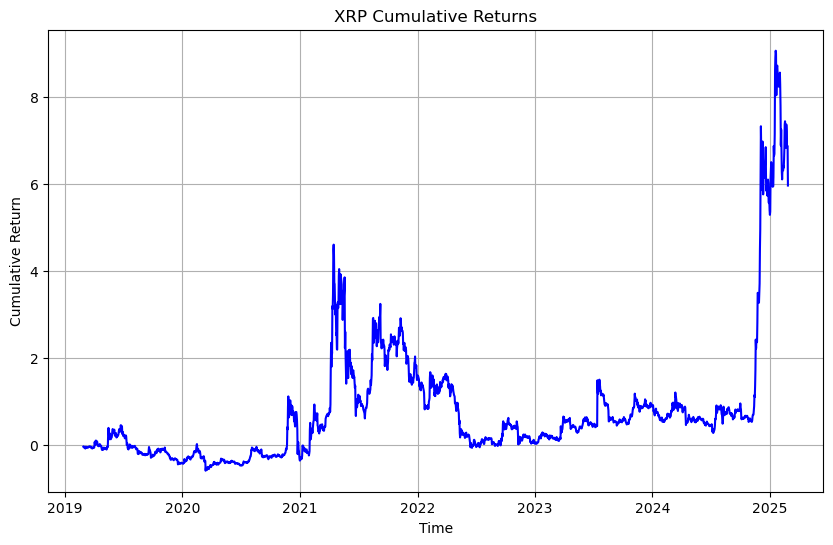

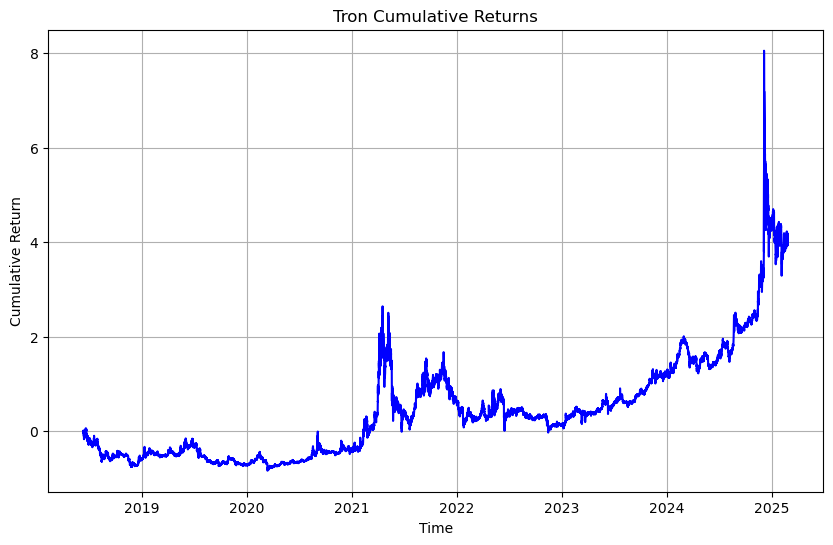

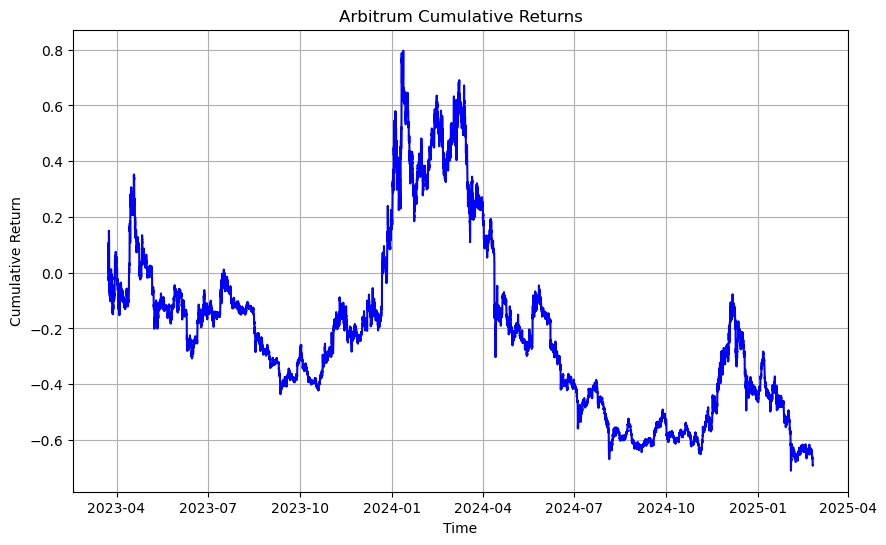

In [51]:
plot_cumulative_return_data(avax_df, "avax", title='Avalanche Cumulative Returns')
plot_cumulative_return_data(btc_df, "btc", title='Bitcoin Cumulative Returns')
plot_cumulative_return_data(eth_df, "eth", title='Ethereum Cumulative Returns')
plot_cumulative_return_data(matic_df, "matic", title='Polygon Cumulative Returns')
plot_cumulative_return_data(sol_df, "sol", title='Solana Cumulative Returns')
plot_cumulative_return_data(bnb_df, "bnb", title='Binance Coin Cumulative Returns')
plot_cumulative_return_data(cardano_df, "cardano", title='Cardano Cumulative Returns')
plot_cumulative_return_data(link_df, "link", title='Chainlink Cumulative Returns')
plot_cumulative_return_data(xrp_df, "xrp", title='XRP Cumulative Returns')
plot_cumulative_return_data(tron_df, "tron", title='Tron Cumulative Returns')
plot_cumulative_return_data(arbitrum_df, "arbitrum", title='Arbitrum Cumulative Returns')

In [ ]:
def plot_return_correlations(df, return_columns=None, title='Correlation of Returns', figsize=(10, 8)):

    if return_columns is None:
        return_columns = df.columns
    
    corr_matrix = df[return_columns].corr()
    
    plt.figure(figsize=figsize)
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
    plt.title(title)
    plt.show()

In [ ]:
dfs = [
    avax_df[['time', 'avax_return']],
    btc_df[['time', 'btc_return']],
    eth_df[['time', 'eth_return']],
    matic_df[['time', 'matic_return']],
    sol_df[['time', 'sol_return']],
    bnb_df[['time', 'bnb_return']],
    cardano_df[['time', 'cardano_return']],
    link_df[['time', 'link_return']],
    xrp_df[['time', 'xrp_return']],
    tron_df[['time', 'tron_return']],
    arbitrum_df[['time', 'arbitrum_return']]
]

all_returns_df = reduce(lambda left, right: pd.merge(left, right, on='time', how='outer'), dfs)
all_returns_df = all_returns_df.drop('time', axis=1)

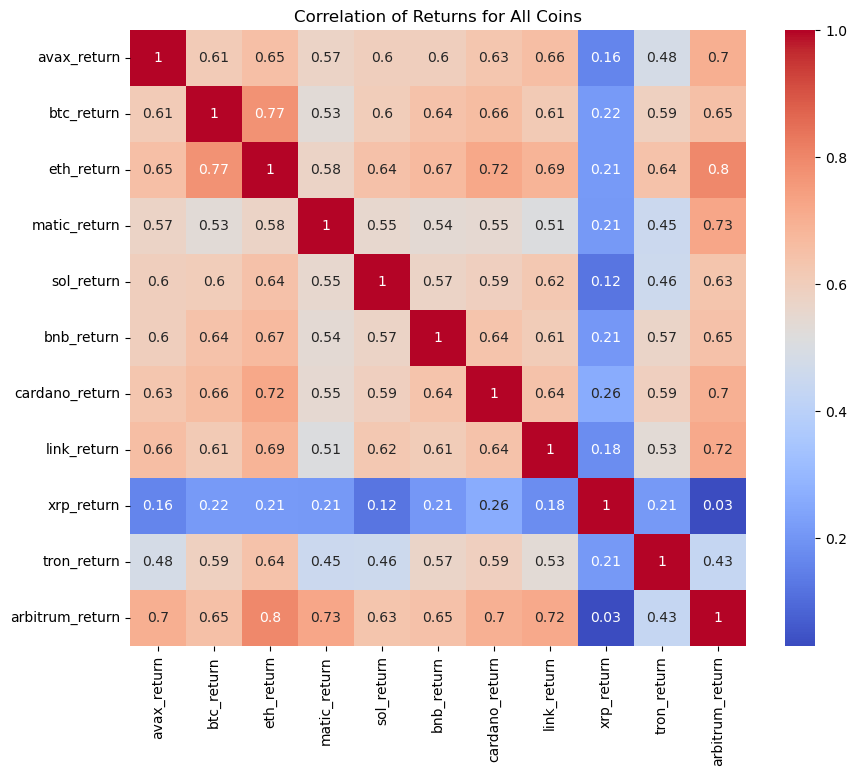

In [56]:
plot_return_correlations(all_returns_df, title='Correlation of Returns for All Coins')